# The very first Virtual Rat RNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from RNN import FirstRNN
from VirtualRatFunctions import *
from RNN_solver import RNNsolver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

allRatsData = getData(5)

MySQLdb not found
Using mysql.connector
Loaded defaults from ~/.dbconf
Z009 (12771, 6)
A099 (23265, 6)
A109 (42333, 6)
Z014 (37888, 6)
Z010 (55682, 6)


In [2]:
data = processData(allRatsData)

In [4]:
RNNs = {}
solvers = {}
choices = {}
probabilities = {}
accuracies = {}
for ratname in data.keys():
    print ratname
    ratData = data[ratname]
    RNN = FirstRNN(hidden_dim = 5)
    RNNs[ratname] = RNN
    solver = RNNsolver(RNN, ratData['trainX'], ratData['trainY'],optim_config={
                     'learning_rate': 1e-4,
                   }, num_epochs = 500,
                       verbose = True)
    solvers[ratname] = solver
    solver.train()
    choice, probs = RNN.predict(ratData['valX'])
    probabilities[ratname] = probs
    choices[ratname] = choice
    acc = np.mean(choice == ratData['valTrueY'])
    accuracies[ratname] = acc
    print acc

Z014
(Iteration 1 / 500) loss: 38795.859393
(Iteration 11 / 500) loss: 32240.363307
(Iteration 21 / 500) loss: 31883.355070
(Iteration 31 / 500) loss: 31070.082324
(Iteration 41 / 500) loss: 30101.925020
(Iteration 51 / 500) loss: 29539.602414
(Iteration 61 / 500) loss: 29411.688586
(Iteration 71 / 500) loss: 29386.958104
(Iteration 81 / 500) loss: 29305.039457
(Iteration 91 / 500) loss: 29227.497220
(Iteration 101 / 500) loss: 29170.849044
(Iteration 111 / 500) loss: 29124.531593
(Iteration 121 / 500) loss: 29084.994072
(Iteration 131 / 500) loss: 29049.400635
(Iteration 141 / 500) loss: 29024.584487
(Iteration 151 / 500) loss: 28992.266910
(Iteration 161 / 500) loss: 28930.019627
(Iteration 171 / 500) loss: 28880.213178
(Iteration 181 / 500) loss: 28849.820930
(Iteration 191 / 500) loss: 28830.356663
(Iteration 201 / 500) loss: 28816.813097
(Iteration 211 / 500) loss: 28806.953429
(Iteration 221 / 500) loss: 28799.647089
(Iteration 231 / 500) loss: 28794.172092
(Iteration 241 / 500) 

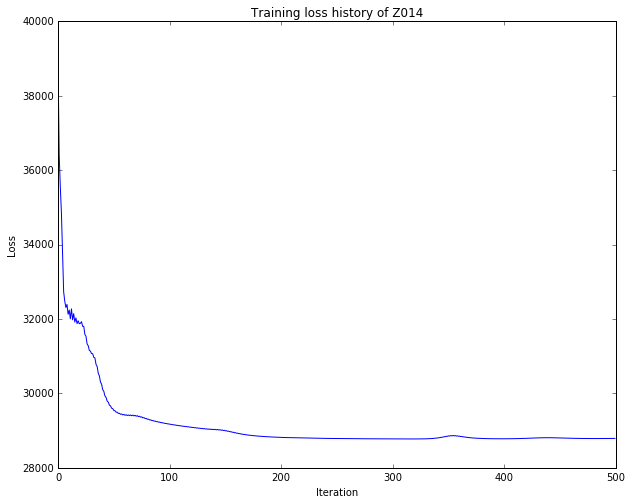

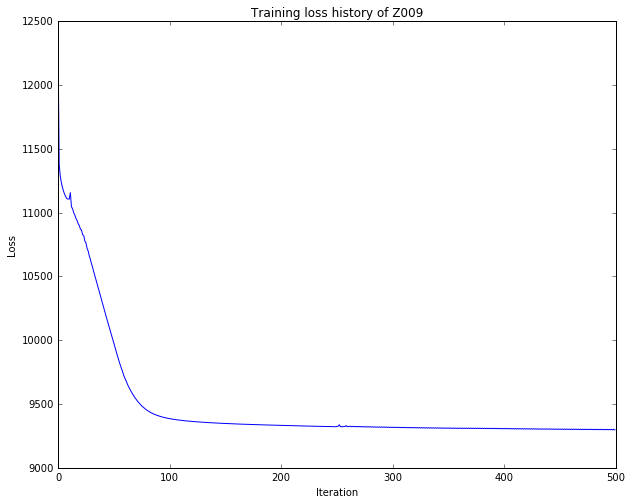

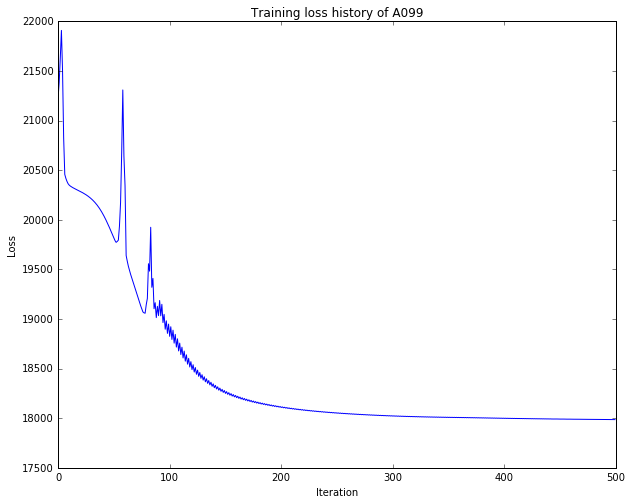

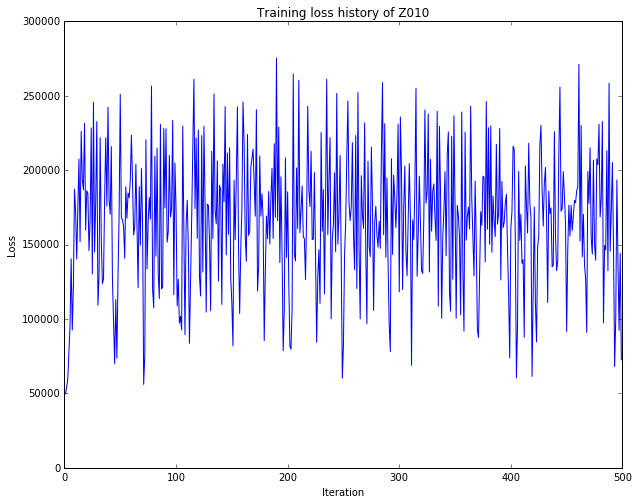

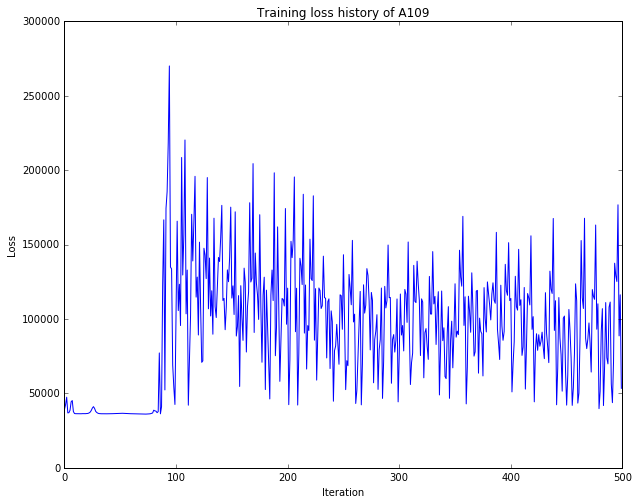

In [7]:
# Plot the training losses
for ratname in solvers.keys():
    plt.plot(solvers[ratname].loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history of '+ ratname)
    plt.show()

In [10]:
postRNNdata = postRNNdataProcessing(probabilities, data)

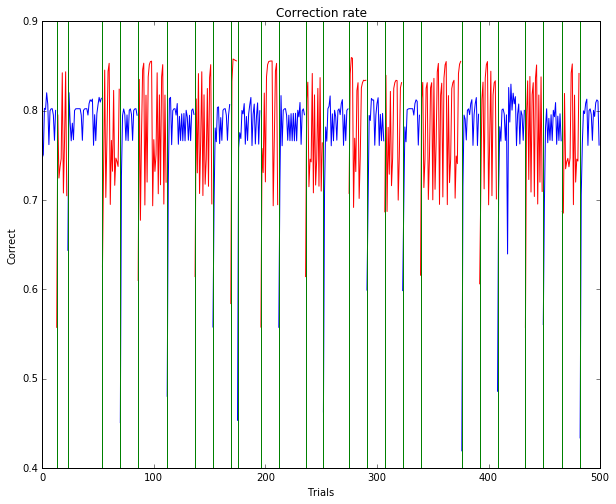

In [47]:
T = len(hit_rate)
plt.plot(range(500), pro_prob[:500],color='b')
plt.plot(range(500), anti_prob[:500],color='r')
for i in xrange(len(switches[:27])):
    plt.axvline(x=switches[i], ymin=0, ymax = 1, linewidth=1, color='g')
    
plt.xlabel('Trials')
plt.ylabel('Correct')
plt.title('Correction rate')
plt.show()